# Placa Kirchoff Biapoiada - PTV - 2 ordem

In [1]:
# Importar biblioteca
from sympy import *
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Declarar variáveis
x, y, z, h, q0, E, v, a , b, v= symbols('x y z h q0 E v a b v')
# Declarar funções de aproximação
phi = Matrix([[x*(x-0.8)**1*y*(y-0.8)**1, x*(x-0.8)**1*y*(y-0.8)**2, x*(x-0.8)**2*y*(y-0.8)**1, x*(x-0.8)**2*y*(y-0.8)**2]])
dphixx = diff(phi,x,x)
dphiyy = diff(phi,y,y)
dphixy = diff(phi,x,y)
D = 200e6*0.02**3/(12*(1-0.3)**2)
# Número de funções de aproximação
n=4

Construção da matriz $\mathbf{K}$ e do vetor $\mathbf{F}$, onde:

$K_{ij} = D \int_{0}^{b} \int_{0}^{a} \Phi xx_i (\Phi xx_j + v \Phi yy_j) + \Phi yy_i (\Phi yy_j + v \Phi xx_j) + 2 (1-v) \Phi xy_i \Phi xy_j dx dy$   
$F_i    = \int_{0}^{b} \int_{0}^{a} \Phi_i q_0 dx dy$

In [3]:
# Loop para construção de K e F
K=zeros(n,n)
F=zeros(n,1)
for i in range(n):
    for j in range(n):
        aux=integrate(integrate(dphixx[i]*(dphixx[j]+0.3*dphiyy[j])+dphiyy[i]*(dphiyy[j]+0.3*dphixx[j])+2*(1-0.3)*dphixy[i]*dphixy[j], (x, 0, 0.8)), (y, 0, 0.8))
        if i<=j:
            K[i,j]=D*aux
        else:
            K[i,j]=K[j,i]
    aux2=integrate(integrate(phi[i]*4, (x, 0, 0.8)), (y, 0, 0.8))
    F[i]=aux2
# Solução do sistema de equações
c=simplify(K.inv()*F)
print('c =')
print(c)

c =
Matrix([[0.000835227272727360], [2.24646690138997e-16], [2.23779328401008e-16], [5.81132364452230e-16]])


In [4]:
# Calcular w
w = phi*c
f = np.squeeze(np.asarray(w))
print('w = ')
print(f)

w = 
5.8113236445223e-16*x*y*(x - 0.8)**2*(y - 0.8)**2 + 2.23779328401008e-16*x*y*(x - 0.8)**2*(y - 0.8) + 2.24646690138997e-16*x*y*(x - 0.8)*(y - 0.8)**2 + 0.00083522727272736*x*y*(x - 0.8)*(y - 0.8)


In [5]:
# Calcular Energia Potencial Total
Pi=D*0.5*(integrate(integrate((w.diff(x,x)+w.diff(y,y))**2+2*(1-0.3)*(w.diff(x,y)**2-w.diff(x,x)*w.diff(y,y))-4*w*2/D, (x, 0, 0.8)),(y, 0, 0.8)))
print('Pi = ')
Pi.subs([(E, 200e6), (h, 0.02), (v, 0.3), (q0, 4), (a, 0.8), (b, 0.8)])

Pi = 


Matrix([[-1.21638787878788e-5]])

## Plotagem

In [6]:
# Definir valor dos parâmetros da placa
E,h,v,q0,a,b=200e6,0.02,0.3,40,0.8,0.8

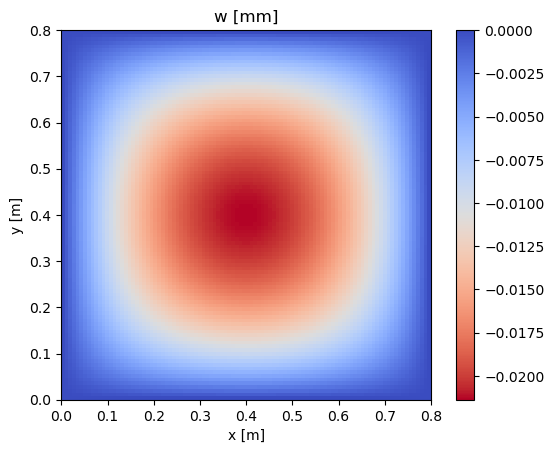

In [15]:
# Criar uma mesh 2D
x = np.linspace(0, 0.8, 100)
y = np.linspace(0, 0.8, 100)
X, Y = np.meshgrid(x, y)

# Plotar o mapa de calor
plt.imshow((5.8113236445223e-16*X*Y*(x - 0.8)**2*(Y - 0.8)**2 + 2.23779328401008e-16*X*Y*(X - 0.8)**2*(Y - 0.8) + 2.24646690138997e-16*X*Y*(x - 0.8)*(Y - 0.8)**2 + 0.00083522727272736*X*Y*(X - 0.8)*(Y - 0.8))*-1000, cmap='coolwarm_r', extent=[x.min(), x.max(), y.min(), y.max()])

# Legenda
plt.colorbar()

# Eixos
plt.xlabel('x [m]')
plt.ylabel('y [m]')

# Título
plt.title('w [mm]')

# Plot
plt.show()